# Project - Bank Churn Prediction

## Description 
### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective 

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

## Reading Dataset and Feature Elimination

Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


In [2]:
#Loading the data.
bank_data = pd.read_csv("bank.csv")

In [3]:
# View first five rows of dataframe to check whether excel sheet is loaded or not
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#checking structure of the data.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Observation
The dataset has 10000 rows and 14 columns.

In [5]:
#Dropping surname column as it's not required for our predication.
bank_data.drop(columns='Surname',axis=0, inplace=True)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


### Observation
Total no of columns in the dataset is 14. 9 columns are int, 3 columns are Object & 2 are float.
Total no of rows is 10000.

In [7]:
# Code to understand null values in the data.
bank_data.isna().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observation - The dataset doesnt have null values.

In [8]:
# Statistical summary of the data.
pd.set_option('float_format', '{:f}'.format)
bank_data[['RowNumber','CustomerId','CreditScore', 'Age','Tenure',
            'Balance','HasCrCard','IsActiveMember','EstimatedSalary',
            'Exited']].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,10000.000000,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


#### Observation
1. Row number is a continous column starting from 1 to 10,000.
2. Customer ID is number assigned to each customer.
3. Credit score min is 350 and max of 850
4. Min 18 yrs and max of 92 yrs are the customer base
5. Tenure starts from 0 to 10 yrs with an average of 5yrs
6. Balance is min of 0 and max 250908. Std is 62K approx indicates there is large deviation from the mean.
7. HasCrCard, IsActiveMember, EstimatedSalary and Exited are categorical column with 1 or 0 as values.


In [9]:
#Dropping row number unique for each row and not required for our prediction.
bank_data.drop(columns='RowNumber',axis=0, inplace=True)

In [10]:
#Dropping customerid as it's not required for our prediction.
bank_data.drop(columns='CustomerId',axis=0, inplace=True)

In [11]:
#checking structure of data to ensure rownumber and customer id is dropped.
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
#Checking value counts of Geography 
bank_data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
#Checking value counts of Gender 
bank_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [14]:
#Checking value counts of Geography and Gender as cateogical columns with numerical values,
replaceStruct = {
                "Geography": {"France": 1, "Germany": 2,"Spain": 3},
                "Gender": {"Male":1, "Female":2}
                }
# Replace dataframe structure with dictionary created above
bank_data=bank_data.replace(replaceStruct)
bank_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,42,2,0.000000,1,1,1,101348.880000,1
1,608,3,2,41,1,83807.860000,1,0,1,112542.580000,0
2,502,1,2,42,8,159660.800000,3,1,0,113931.570000,1
3,699,1,2,39,1,0.000000,2,0,0,93826.630000,0
4,850,3,2,43,2,125510.820000,1,1,1,79084.100000,0


In [15]:
#Check structure of the data 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [16]:
#Create a list with columns that categorical values
cat_cols=['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'Exited']

cat_cols
#Create a list with columns that numerical values
cont_cols = ['CreditScore', 'Age','Tenure',
           'Balance', 'EstimatedSalary']

In [17]:
# Printing value colunts of each categorical columns
for i in bank_data[cat_cols].columns:
    print(str(bank_data[i].value_counts()))

1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64
1    5014
2    2509
3    2477
Name: Geography, dtype: int64
1    5457
2    4543
Name: Gender, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64


In [18]:
#Checking distribution of targed variable.
(bank_data['Exited'].value_counts())/(bank_data['Exited'].count())

0   0.796300
1   0.203700
Name: Exited, dtype: float64

#### Observation - The target variable has slight bias which is understandable for this dataset.. I made an assumption that 1 as left the bank and 0 stayed with the bank. 20% of customer left the bank and remaining stayed. 

## Perform an Exploratory Data Analysis on the data

Checked whether the dataset is balanced or not - Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Any other exploratory deep dive

In [19]:
# Defining a function for cateogrical graph
def categorical_unigraphs(features):
    print(features)
    for i in bank_data[features].columns:
        #sns.barplot(tour_data[i].value_counts().index,tour_data[i].value_counts()).set_title(i)
        graph = sns.barplot(bank_data[i].value_counts().index,
                    (bank_data[i].value_counts()/len(bank_data)*100)).set_title(i)
        plt.ylim(0,100)
        plt.show()

['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'Exited']


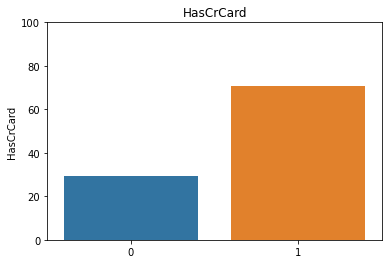

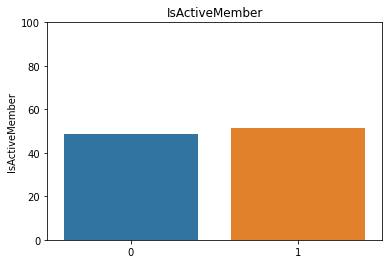

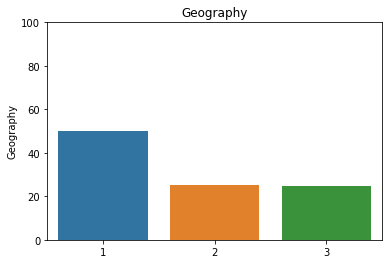

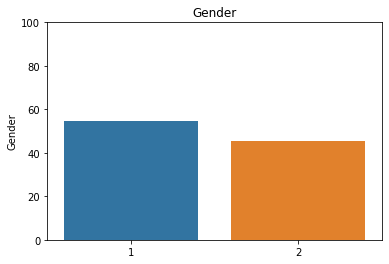

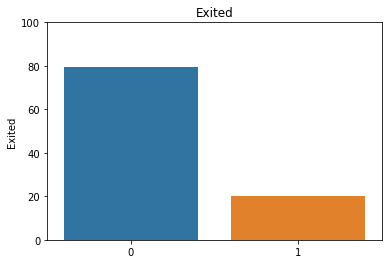

['HasCrCard', 'IsActiveMember', 'Geography', 'Gender', 'Exited']


In [20]:
# Calling function to print graphs
categorical_unigraphs(cat_cols)
print(cat_cols)

#### Observation
Very self explantory graphs for all categorical columns with histograms.

In [21]:
# Univariate analysis for Continous Columns.
def continous_unigraphs(features):
    for i in bank_data[features].columns:
        sns.boxplot(bank_data[i], showmeans=True)
        plt.show()
        sns.histplot(data=bank_data, x= i , kde=True)
        plt.show()

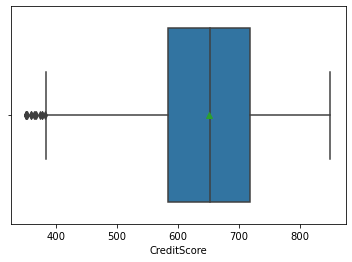

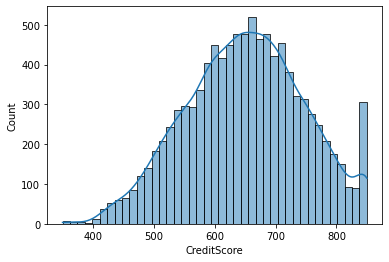

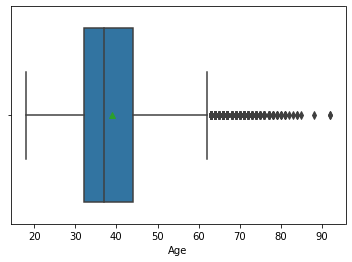

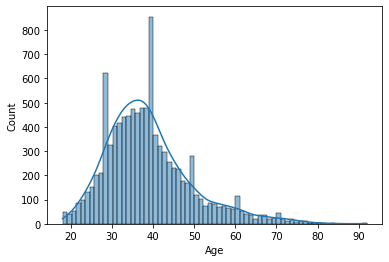

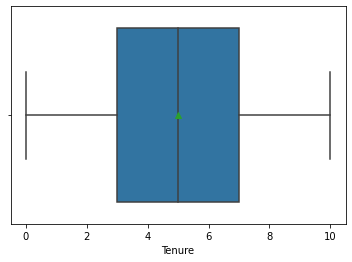

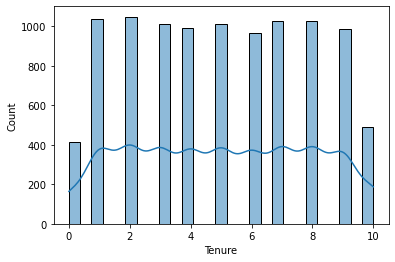

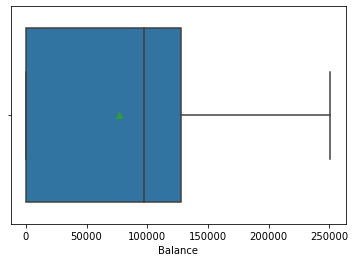

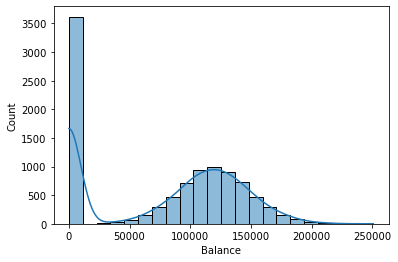

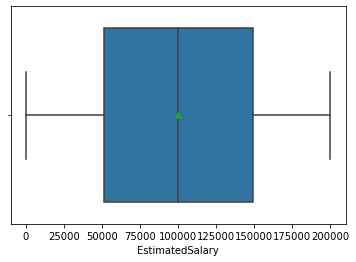

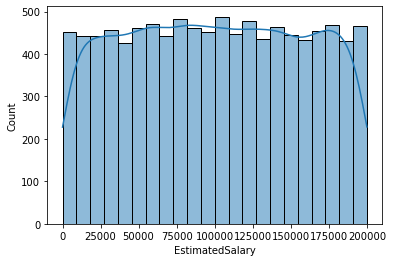

In [22]:
# Call function to print univariate graphs for continous features .
continous_unigraphs(cont_cols)

In [23]:
#Bivariate analysis of the data
def prodtaken_bivariate(feature):
    total = bank_data.groupby(by=feature)['Exited'].count().reset_index()
    Exited_No = (bank_data[bank_data['Exited']==0]).groupby(by=feature)['Exited'].count().reset_index()

    #print(total)
    bar1 = sns.barplot(x= feature,  y='Exited', data=total, color='red')
    bar2 = sns.barplot(x=feature, y='Exited', data=Exited_No, color='green')

    
    top_bar = mpatches.Patch(color='red', label='Exited = 1')
    bottom_bar = mpatches.Patch(color='green', label='Exited = 0')
    plt.legend(handles=[top_bar, bottom_bar])
    plt.show()

HasCrCard


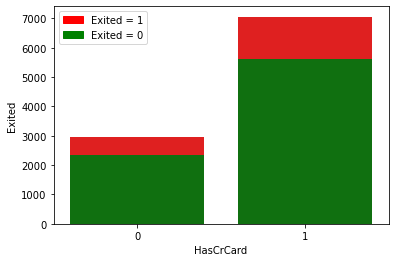

IsActiveMember


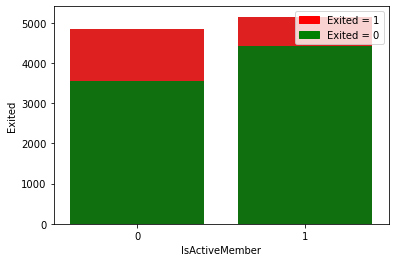

Geography


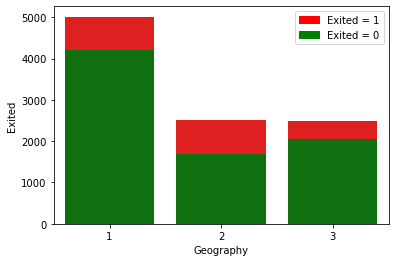

Gender


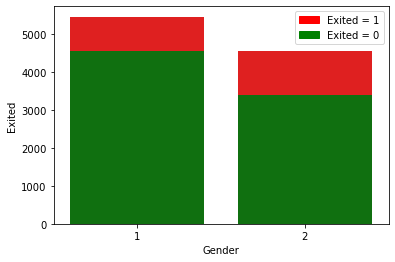

In [24]:
# Iterate each category columns to print bivariate graph.
for i in bank_data[cat_cols].columns:
    if i != 'Exited':
        print(i)
        prodtaken_bivariate(i)

#### Observation 
From graphs above, we can observe that exited is equally distributed 0 and 1 across all categorical columns.

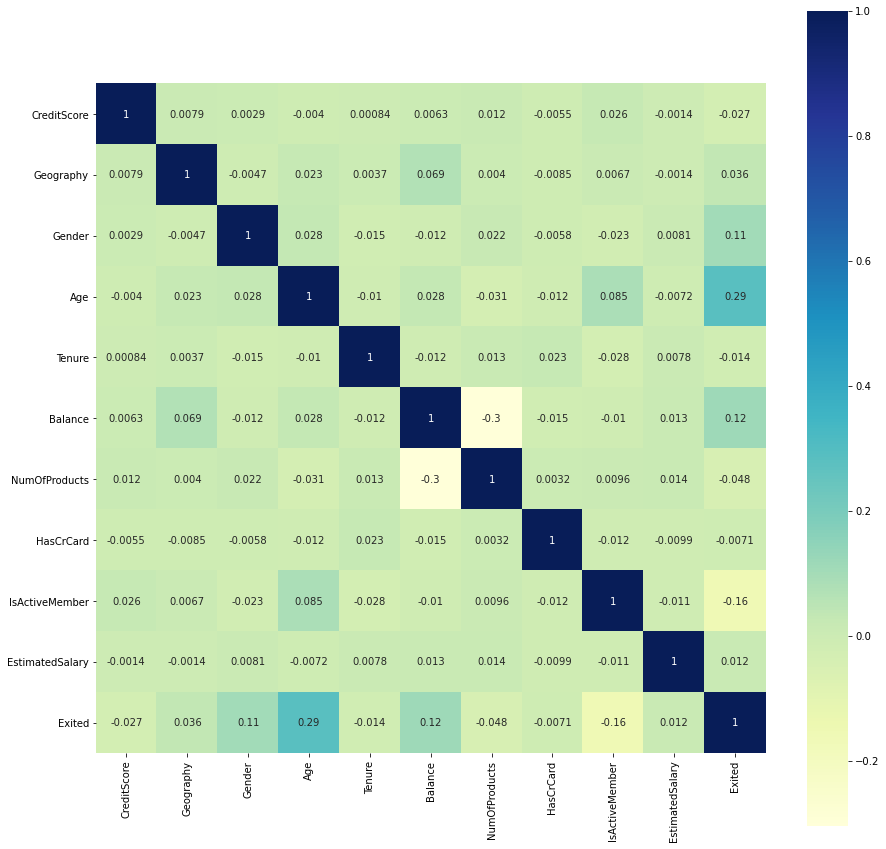

In [25]:
# Print correlation graph
plt.figure(figsize=(15,15))
sns.heatmap(bank_data.corr(),annot=True, cmap="YlGnBu", square=True);

#### Observations 
High correlation can be seen with Exited vs Age 

<AxesSubplot:>

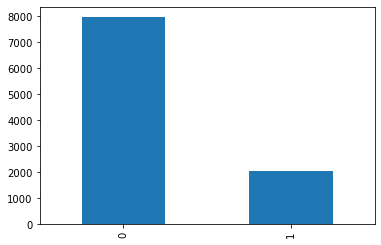

In [26]:
#visual representation Exited (i.e. target columns)
bank_data['Exited'].value_counts().plot.bar()

In [27]:
#Processing the data with standardscalar to normalize data.
from sklearn.preprocessing import StandardScaler
creditcard_2d = bank_data
scaler = StandardScaler()
scaler.fit(bank_data)
scaled_data = scaler.transform(bank_data)
scaled_data.shape

(10000, 11)

In [28]:
scaled_data

array([[-0.32622142, -0.90188624,  1.09598752, ...,  0.97024255,
         0.02188649,  1.97716468],
       [-0.44003595,  1.51506738,  1.09598752, ...,  0.97024255,
         0.21653375, -0.50577476],
       [-1.53679418, -0.90188624,  1.09598752, ..., -1.03067011,
         0.2406869 ,  1.97716468],
       ...,
       [ 0.60498839, -0.90188624,  1.09598752, ...,  0.97024255,
        -1.00864308,  1.97716468],
       [ 1.25683526,  0.30659057, -0.91241915, ..., -1.03067011,
        -0.12523071,  1.97716468],
       [ 1.46377078, -0.90188624,  1.09598752, ..., -1.03067011,
        -1.07636976, -0.50577476]])

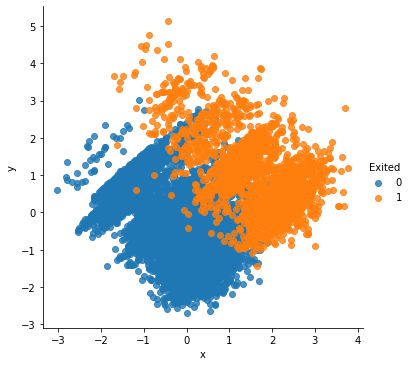

In [29]:
# Performing prinicipal component analysis on the data to visualize dataset with reduced dimensions in two dimensions.
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(scaled_data))
creditcard_2d = pd.concat([creditcard_2d, bank_data['Exited']], axis=1)
creditcard_2d.columns= ['x', 'y', 'Exited']
sns.lmplot(x='x', y='y', data=creditcard_2d, fit_reg=False, hue='Exited')

#### Observation 
Using PCA we see two categories equally distributed with two categories Exited 0 and 1.

## Data Pre-processing

Split the target variable and predictors - Split the data into train and test - Rescale the data

In [30]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [31]:
# Splitting data set X and Y/ Y is target
X_data = bank_data.iloc[:,0:9]
y_data = bank_data.iloc[:, -1]


print(X_data.shape)
print(y_data.shape)

(10000, 9)
(10000,)


In [32]:
X_data.shape

(10000, 9)

In [33]:
X_data.shape

(10000, 9)

In [34]:
#Using standard scalar normizling X_data
scaler = StandardScaler()
scaler.fit(X_data)
X_data = scaler.transform(X_data)
X_data.shape

(10000, 9)

In [35]:
X_data

array([[-0.32622142, -0.90188624,  1.09598752, ..., -0.91158349,
         0.64609167,  0.97024255],
       [-0.44003595,  1.51506738,  1.09598752, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [-1.53679418, -0.90188624,  1.09598752, ...,  2.52705662,
         0.64609167, -1.03067011],
       ...,
       [ 0.60498839, -0.90188624,  1.09598752, ..., -0.91158349,
        -1.54776799,  0.97024255],
       [ 1.25683526,  0.30659057, -0.91241915, ...,  0.80773656,
         0.64609167, -1.03067011],
       [ 1.46377078, -0.90188624,  1.09598752, ..., -0.91158349,
         0.64609167, -1.03067011]])

In [36]:
# Using train and test split
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 9)
(2000, 9)
(8000,)
(2000,)


## Building model using Random forest classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)

In [40]:
# Fitting the model using X and Y training dataset.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [41]:
#Predicating target Y test dataset using the model that is trained using training dataset.
y_pred = random_forest.predict(X_test)

In [42]:
#Printing score of the model
random_forest.score(X_test,y_test)

0.859

In [43]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

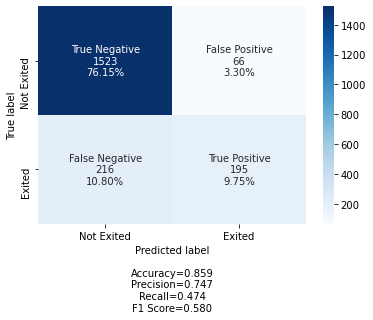

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Observation
From confusion matrix, there is false negatives is 10%. Model is 10% can't predict the exited customers properly which is very high. Recall is very low is not good.

### Tuning Random Forest Classifer

# Neural Network Model

In [43]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [74]:
#initialize the model
import keras
from keras import backend as K
from keras.models import Sequential  # importing the Sequential Model
from keras.layers import Dense, Dropout       # importing Dense layer
model = Sequential()

In [61]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(units=16, input_dim = 9,activation='relu'))   # input of 9 columns as shown above
# hidden layer
model.add(Dense(units=24,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
#model.add(Dense(24,activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))                        # binary classification fraudulent or not

In [62]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                3

In [64]:
print(X_train.shape)
print(y_train.shape)

(8000, 9)
(8000,)


In [65]:
# fitting the model
history=model.fit(X_train,y_train,batch_size=100,epochs=10,validation_split=0.2)

Epoch 1/10
64/64 [==============================] - 1s 4ms/step - loss: 0.6627 - accuracy: 0.6961 - val_loss: 0.5416 - val_accuracy: 0.7894
Epoch 2/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.7988 - val_loss: 0.5156 - val_accuracy: 0.7894
Epoch 3/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7935 - val_loss: 0.5151 - val_accuracy: 0.7894
Epoch 4/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7954 - val_loss: 0.5150 - val_accuracy: 0.7894
Epoch 5/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.7972 - val_loss: 0.5148 - val_accuracy: 0.7894
Epoch 6/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.8018 - val_loss: 0.5148 - val_accuracy: 0.7894
Epoch 7/10
64/64 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7883 - val_loss: 0.5163 - val_accuracy: 0.7894
Epoch 8/10
64/64 [==

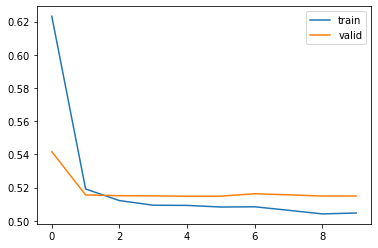

In [66]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


### Observation
Loss of the NN model is pretty consistent after elbow 

## Model Performance Evaluation

Evaluate the model on different performance metrics and comment on the performance and scope of improvement

In [67]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 998us/step - loss: 0.5079 - accuracy: 0.7945


In [69]:
print(score)

[0.507936954498291, 0.7944999933242798]


In [ ]:
# Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# Model Performance Improvement

- Comment on which metric is right for model performance evaluation and why? 


- Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements 




- Include all the model which were trained to reach at the final one


A. Recall is right metric for model. We wanted to ensure that the model predicted customers that have exited. Higher recall score is better for model.

B. As described above, considering Recall is a metric that needs to be looked upon along with other metrics such as Accuracy and Precision. Models needs to be tuned to increase Recall score.

C. Model performance can defintiely be improved however lack of computer power with the PC is limited as it's long time to executed GridsearchCV for randomforest and lack of time for DNN.




## Conclusion and key takeaways

Final conclusion about the analysis